There are two techniques implemented in order to find emission and/or absorption lines in a Spectrum1D spectrum.

The first technique is find_lines_threshold that will find lines by thresholding the flux based on a factor applied to the spectrum uncertainty. The second technique is find_lines_derivative that will find the lines based on calculating the derivative and then thresholding based on it. Both techniques return an QTable that contains columns line_center, line\_type and line\_center\_index.

In [1]:
import numpy as np
from astropy.modeling import models
import astropy.units as u
from specutils import Spectrum1D, SpectralRegion
from specutils.manipulation import extract_region
from specutils.fitting import find_lines_threshold
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
from astropy.wcs import WCS
import warnings
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')

In [2]:
# OUR PN
hdu = fits.open("../Spectra-lamostdr7/spec-56581-VB031N50V1_sp08-218.fits")
hdudata = hdu[0].data
wl = hdudata[2]
Flux = hdudata[0]
inve_var = hdudata[1]
sigma = 1 / np.sqrt(inve_var)

In [3]:
hdu[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11b        
BITPIX  =                  -32 /                                                
NAXIS   =                    2 / Number of array dimensions                     
NAXIS1  =                 3909 /                                                
NAXIS2  =                    5 /                                                
EXTEND  =                    T /                                                
                                                                                
COMMENT --------FILE INFORMATION                                                
FILENAME= 'spec-56581-VB031N50V1_sp08-218.fits' /                               
OBSID   =            165008218 / Unique number ID of this spectrum              
AUTHOR  = 'LAMOST Pipeline'    / Who compiled the information                   
DATA_V  = 'LAMOST DR7'         / Data release version                           
EXTEN0  = 'Flux, Inverse, Wa

In [4]:
import warnings
from specutils.manipulation import noise_region_uncertainty
from astropy.nddata import StdDevUncertainty

In [5]:
ha_region = SpectralRegion((6563-50)*u.AA, (6563+50)*u.AA)
ha_region

Spectral Region, 1 sub-regions:
  (6513.0 Angstrom, 6613.0 Angstrom) 

In [6]:
# Defining units astropy
rel_flux = u.def_unit('Relative~flux')
rel_flux.decompose()

Unit("Relative~flux")

In [7]:
lamb = wl * u.AA 
flux = Flux * rel_flux
Sigma = StdDevUncertainty(sigma * rel_flux)
spec = Spectrum1D(spectral_axis=lamb, flux=flux, uncertainty=Sigma) 

**Adding uncertanting**

In [8]:
#spec = noise_region_uncertainty(spec, noise_region = sigma)

In [9]:
ha_spec = extract_region(spec, ha_region)

$\bf{Finding~the~line}$

In [10]:
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    halpha_lines = find_lines_threshold(ha_spec, noise_factor = 3)

In [11]:
halpha_lines

line_center,line_type,line_center_index
Angstrom,,
float32,str8,int64
6561.45458984375,emission,32


# #SNR

In [12]:
from specutils.analysis import snr
snr(spec) 

<Quantity 3.4997768>

## All spectra

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


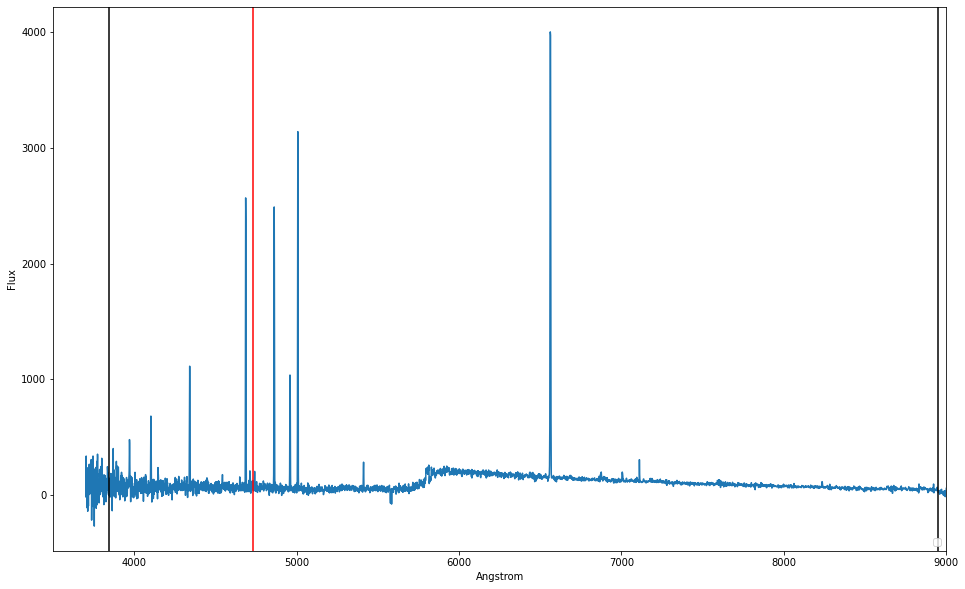

In [68]:
plt.figure(figsize=(16,10))
plt.plot(wl, Flux)#, label = 'total')
plt.xlim((3500, 9000))
#plt.ylim((-0.1, 10e-9))
plt.axvline(3840, c='k')
plt.axvline(8950, c='k')
plt.axvline(4731.513671875, c='r')
plt.xlabel('Angstrom')
plt.ylabel('Flux')
plt.legend(loc=4);

In [26]:
spec_region = SpectralRegion(3840*u.AA, 8950*u.AA)

In [27]:
extra_spec = extract_region(spec, spec_region)

In [62]:
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    extra_lines = find_lines_threshold(extra_spec, noise_factor = 3)

In [63]:
extra_lines

line_center,line_type,line_center_index
Angstrom,,
float32,str8,int64
3867.23095703125,emission,30
3869.01220703125,emission,32
3969.173828125,emission,143
4101.09765625,emission,285
4272.67724609375,emission,463
4308.2421875,emission,499
4323.14794921875,emission,514
...,...,...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


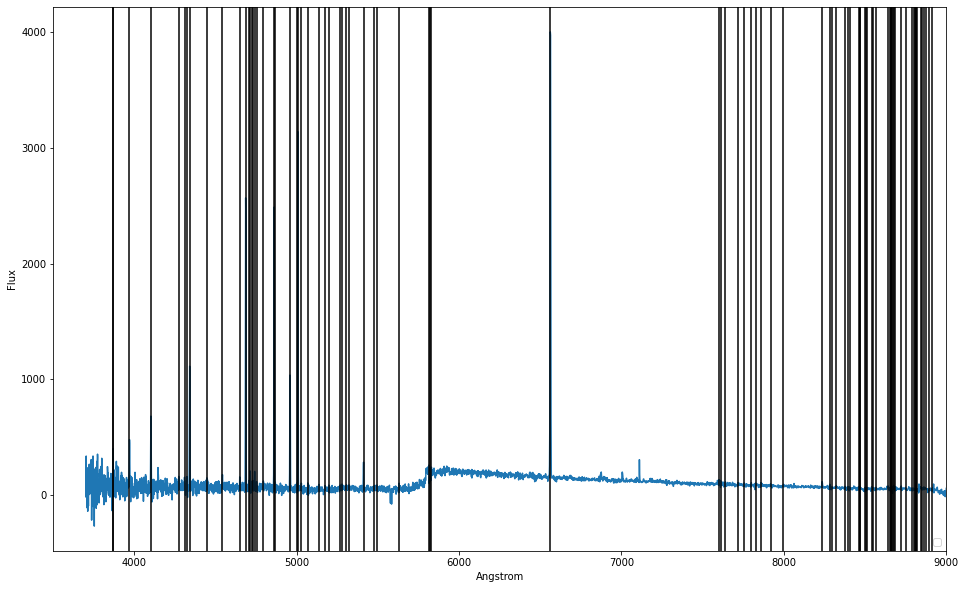

In [64]:
plt.figure(figsize=(16,10))
plt.plot(wl, Flux)#, label = 'total')
plt.xlim((3500, 9000))
#plt.ylim((-0.1, 10e-9))
for i in extra_lines["line_center"].value:
    plt.axvline(i, c='k')
plt.xlabel('Angstrom')
plt.ylabel('Flux')
plt.legend(loc=4);

In [49]:
extra_lines["line_center"]

<Quantity [4101.0977, 4340.1035, 4684.8975, 4860.7144, 4957.927 ,
           5006.107 , 5411.2812, 6532.811 , 6561.4546, 7004.8706,
           7110.4995, 7582.285 , 7591.0195] Angstrom>

In [51]:
for i in extra_lines["line_center"].value:
    print(i)

4101.0977
4340.1035
4684.8975
4860.7144
4957.927
5006.107
5411.2812
6532.811
6561.4546
7004.8706
7110.4995
7582.285
7591.0195
